# Fornax 2021

## Abstract

*Most supernova explosions accompany the death of a massive star. These explosions give birth to neutron stars and black holes and eject solar masses of heavy elements. However, determining the mechanism of explosion has been a half-century journey of great complexity. In this paper, we present our perspective of the status of this theoretical quest and the physics and astrophysics upon which its resolution seems to depend. The delayed neutrino-heating mechanism is emerging as a robust solution, but there remain many issues to address, not the least of which involves the chaos of the dynamics, before victory can unambiguously be declared. It is impossible to review in detail all aspects of this multi-faceted, more-than-half-century-long theoretical quest. Rather, we here map out the major ingredients of explosion and the emerging systematics of the observables with progenitor mass, as we currently see them. Our discussion will of necessity be speculative in parts, and many of the ideas may not survive future scrutiny. Some statements may be viewed as informed predictions concerning the numerous observables that rightly exercise astronomers witnessing and diagnosing the supernova Universe. Importantly, the same explosion in the inside, by the same mechanism, can look very different in photons, depending upon the mass and radius of the star upon explosion. A 1051-erg (one "Bethe") explosion of a red supergiant with a massive hydrogen-rich envelope, a diminished hydrogen envelope, no hydrogen envelope, and, perhaps, no hydrogen envelope or helium shell all look very different, yet might have the same core and explosion evolution.*

### snewpy readme
CCSN neutrino estimates from the 2D Fornax simulation extended to late times (4.0-4.5 seconds after core bounce) by Burrows and Vartanyan. See their [2D simulations index](https://www.astro.princeton.edu/~burrows/nu-emissions.2d/).

The citations to be used are:
* *Core-Collapse Supernova Explosion Theory* by Adam Burrows and David Vartanyan, [Nature 589 (2021) 29](https://www.nature.com/articles/s41586-020-03059-w), [arXiv:2009.14157](https://arxiv.org/abs/2009.14157).

In [1]:
from sspike import pnut, beer
from sspike.supernova import Supernova
from sspike.detectors import Detector

## Progenitor options

- `mass`: 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, or 26.99 S.M.
- `t_start`: -0.3565 to -0.2135
- `t_end`: 3.1135 to 4.7405

Note: lists of start and end times can be seen in supernova.py.

In [2]:
model = 'Fornax_2021'
progenitor = {'mass': 20}
transformation = 'NoTransformation'
distance = 10.0

In [3]:
detector = Detector('kamland')
sn = Supernova(model, progenitor, transformation, distance)

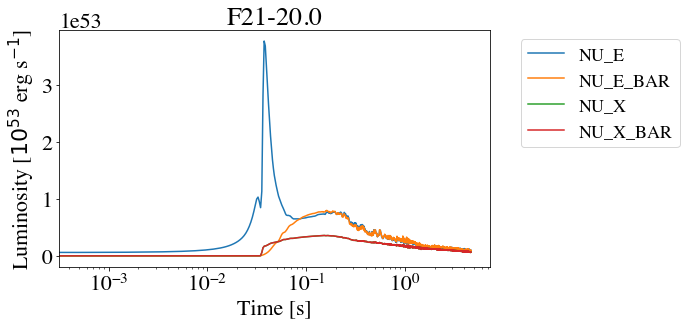

In [4]:
# lum = pnut.get_luminosities(sn)
beer.plot_luminosities(sn)

## Cut fluence

First bin of fluence is O(1e17).  Not sure if this is a bug or not.

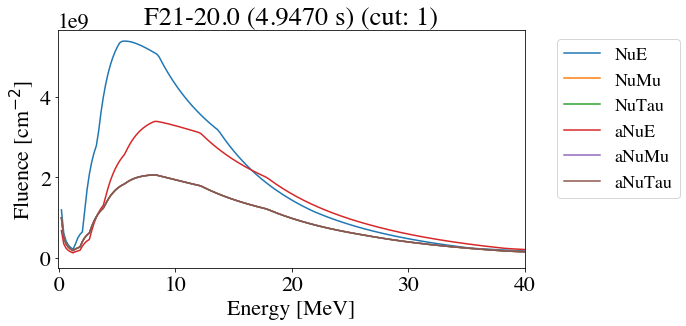

In [5]:
# fluences = pnut.get_fluences(sn)
beer.plot_fluences(sn, cut=1)

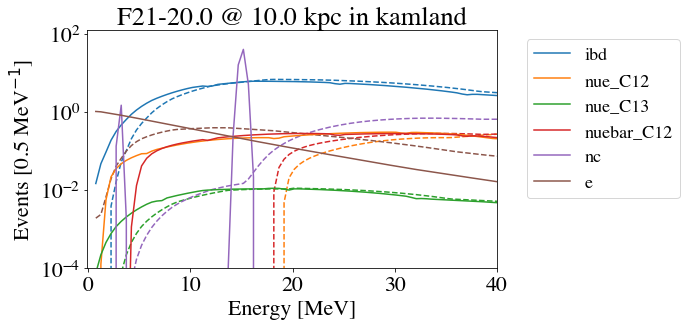

In [6]:
snow_events = pnut.snowglobes_events(sn, detector)
beer.plot_snowglobes_events(sn, detector)

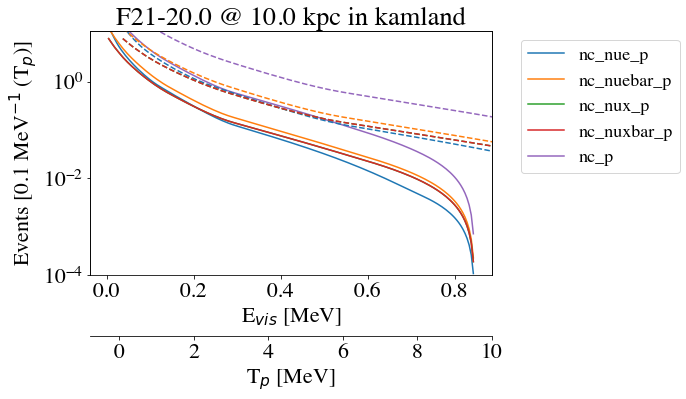

In [7]:
sspike_events = pnut.sspike_events(sn, detector)
beer.plot_sspike_events(sn, detector)

In [8]:
# totals = pnut.event_totals(sn, detector)
beer.bar_totals(sn, detector)

In [9]:
vis = pnut.vis_totals(sn, detector)
beer.bar_vis(sn, detector)

In [10]:
vis

,model,mass,channel,events
0,Fornax_2021,20.0,ibd,413.086672
1,Fornax_2021,20.0,nue_C12,32.784880
2,Fornax_2021,20.0,nue_C13,0.746802
3,Fornax_2021,20.0,nuebar_C12,30.395073
4,Fornax_2021,20.0,nc,62.483221
5,Fornax_2021,20.0,e,19.753823
6,Fornax_2021,20.0,nc_p,35.917809


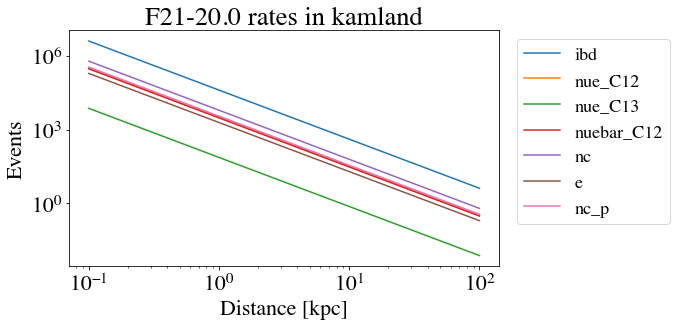

In [11]:
beer.plot_distance_rates(sn, detector)

## Time series

In [12]:
t_bins = 20
t_start = 0.0
t_end = 0.5
sn2 = Supernova(model, progenitor, transformation, distance, t_bins, t_start, t_end)

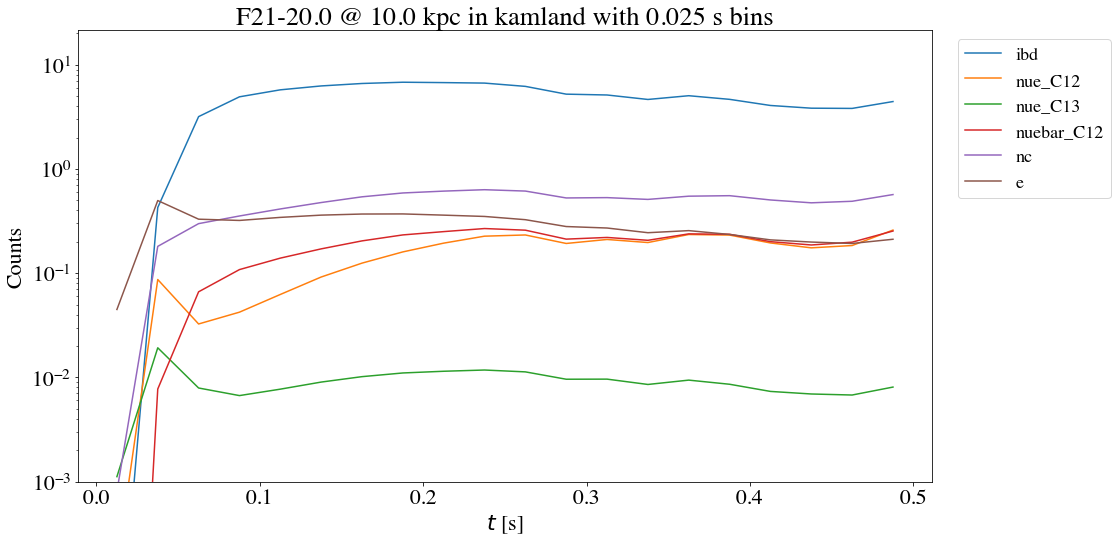

In [13]:
counts = pnut.time_events(sn2, detector)
beer.plot_series(sn2, detector)

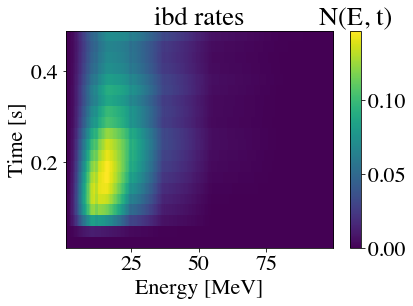

In [14]:
beer.plot_N_chan(sn2, detector, 'ibd')

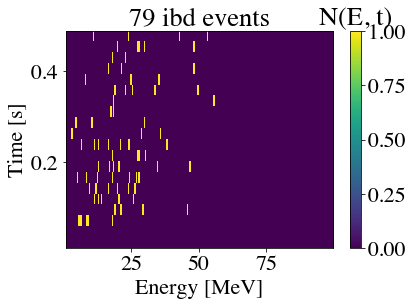

In [15]:
beer.plot_N_chan(sn2, detector, 'ibd', events=True, save=False)

## 500 ms totals

Single bin simulation to compare rates with random event generator.

In [16]:
sn3 = Supernova(model, progenitor, transformation, distance, 1, t_start, t_end)
snow = pnut.snowglobes_events(sn3, detector)
nc = pnut.sspike_events(sn3, detector)
tots = pnut.event_totals(sn3, detector)
vis = pnut.vis_totals(sn3, detector)
vis

,model,mass,channel,events
0,Fornax_2021,20.0,ibd,94.395835
1,Fornax_2021,20.0,nue_C12,3.133163
2,Fornax_2021,20.0,nue_C13,0.182072
3,Fornax_2021,20.0,nuebar_C12,3.657974
4,Fornax_2021,20.0,nc,9.413479
5,Fornax_2021,20.0,e,5.769600
6,Fornax_2021,20.0,nc_p,2.582694


## 500 ms events by distance

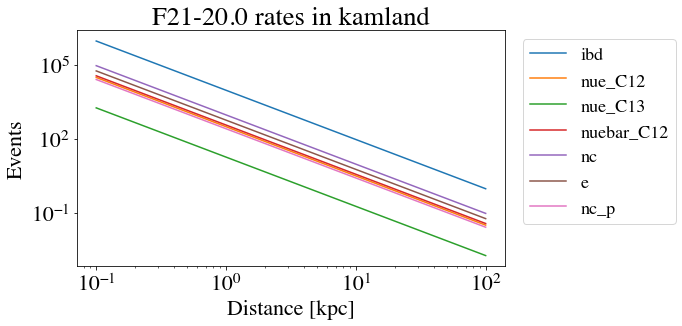

In [17]:
beer.plot_distance_rates(sn3, detector)